In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [7]:
df=pd.read_csv('C:/Users/SUNNY/Desktop/Practice/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Making group by Area type 

In [8]:
df1=df.groupby('area_type')['area_type'].agg('count')
df1

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df2=df.drop(['area_type','availability','society','balcony'], axis=1)
df2.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


checking how many values are null for different feature

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

dropping the null values 

In [12]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Preprocessing 
we can see that 4 bedrooms and 4 bhk are same  

In [14]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\SUNNY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Above we can see that 43 bedrooms on 2400 aqrft is a kind of impossible therefore need to clean it 

In [17]:
df3['total_sqft'].unique() # there is a range of sqr feets 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True 


In [19]:
df3[~df3['total_sqft'].apply(is_float)].head()
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [68]:
# this function is replacing the value by average of the range 
def Convert_into_num(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x) 
    except:
        return None
    

In [69]:
df4=df3.copy()

In [70]:
df4['total_sqft']=df4['total_sqft'].apply(Convert_into_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# Feature Engineering 

In [71]:
df5=df4.copy()
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [72]:
df5['price_pr_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

#computed a new feature 


,location,size,total_sqft,bath,price,bhk,price_pr_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [73]:
df5.location=df5.location.apply(lambda x:x.strip()) #removing extra spaces 
location_state=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_state.head()

location
Whitefield         535
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     266
Thanisandra        236
Name: location, dtype: int64

In [74]:
len(location_state[location_state]<=10)

1293

In [75]:
location_state_less_than_10=location_state[location_state]<=10
location_state_less_than_10.head()

location
Bhagyalakshmi Avenue          True
Vasantha Vallabha Nagar       True
MS Pallya                     True
Vignana Nagar                 True
2nd Phase Judicial Layout    False
Name: location, dtype: bool

In [76]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_state_less_than_10 else x)
df5.head(5)

,location,size,total_sqft,bath,price,bhk,price_pr_sqft
0,other,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,other,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,other,2 BHK,1200.0,2.0,51.00,2,4250.000000


# Outlier Removal

In [77]:
df5.shape

(13246, 7)

In [78]:
df6=df5[~(df5.total_sqft/df5.bhk<300)] #filter based on this condition
df6.shape

(12502, 7)

In [80]:
df6.price_pr_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_pr_sqft, dtype: float64

In [81]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_pr_sqft)
        st=np.std(subdf.price_pr_sqft)
        reduced_df=subdf[(subdf.price_pr_sqft>(m-st)) & (subdf.price_pr_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out
df7=remove_pps_outliers(df6)

    

there are some data in which same square area with 2 bedrooms is expensive than same area with 3 
bedrooms which is unusual to check such data we are going to plot the data

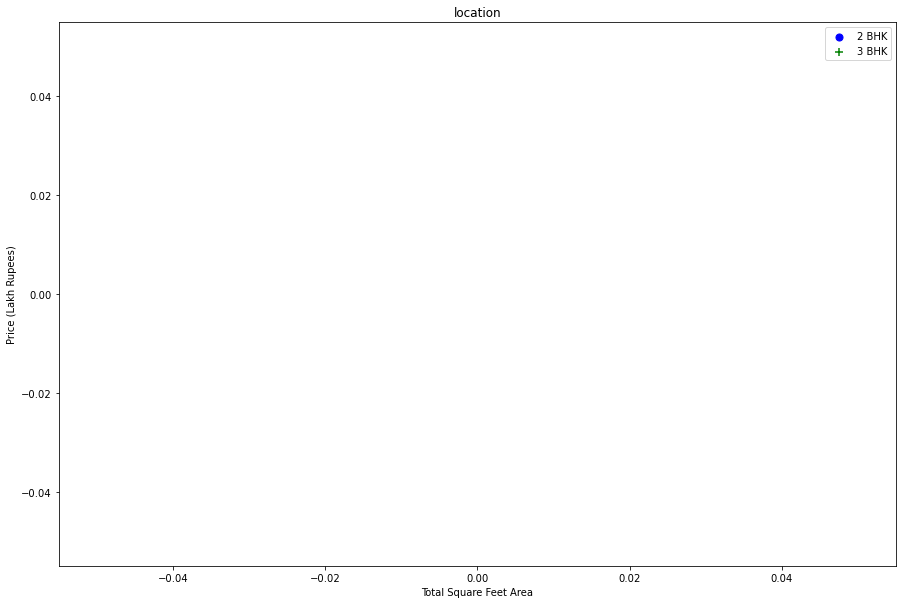

In [86]:
from matplotlib import pyplot as plt
%matplotlib inline 
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Rupees)")
    plt.title('location')
    plt.legend()
    plt.show()
plot_scatter_chart(df7,"Rajaji Nagar")

remove those 2 BHK apartments whose price_pr_sqft is less than mean price_per_sqft of 1 BHK and so on 

In [92]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_pr_sqft),
                'std': np.std(bhk_df.price_pr_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_pr_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(6565, 7)

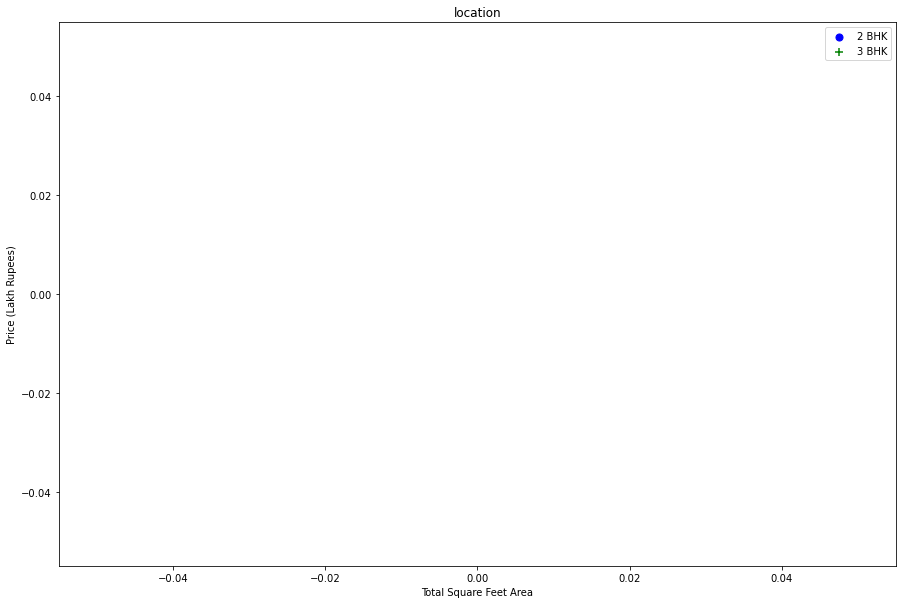

In [93]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

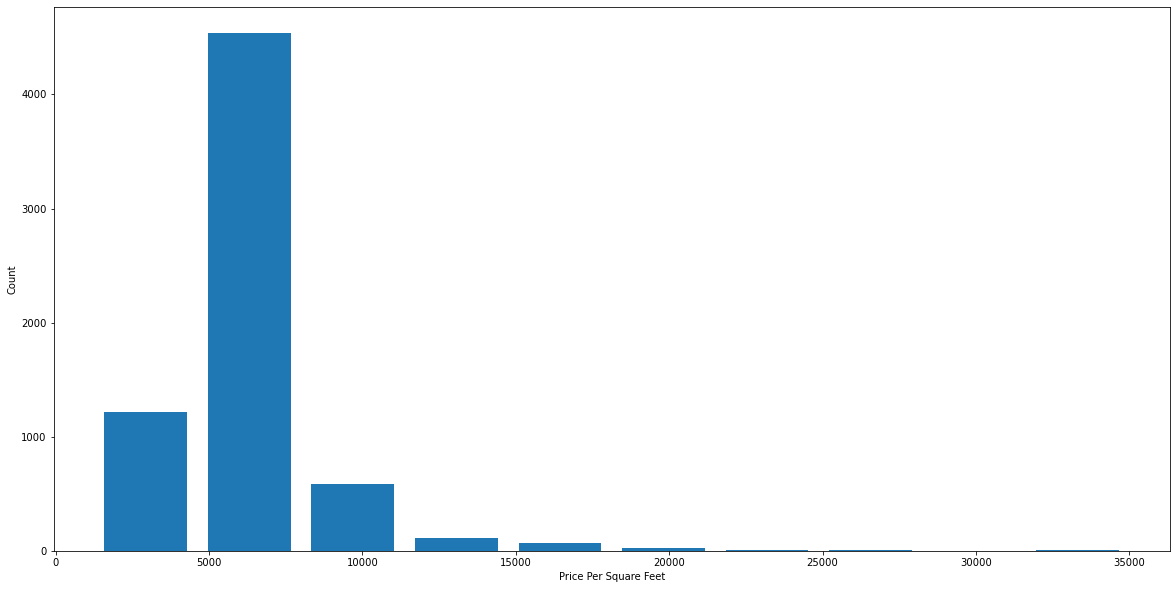

In [94]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_pr_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [95]:
df8.bath.unique()

array([ 3.,  1.,  4.,  2.,  5.,  8.,  9.,  6., 14.,  7., 12.])

Text(0, 0.5, 'Count')

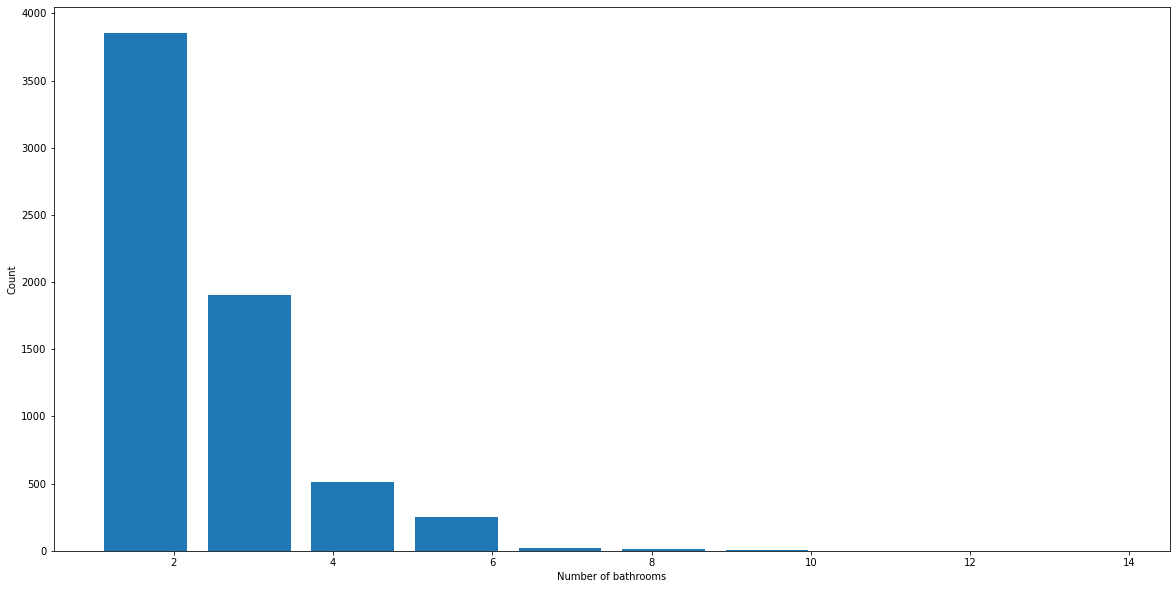

In [96]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [97]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_pr_sqft
448,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
2851,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000


In [98]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_pr_sqft
448,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
984,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
2785,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
3188,Sathya Sai Layout,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9289,other,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [99]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6483, 7)

In [100]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_pr_sqft
0,1st Block BEL Layout,3 BHK,1540.0,3.0,85.0,3,5519.480519
1,1st Block HBR Layout,1 BHK,600.0,1.0,45.0,1,7500.000000


# Preparing data for training 

In [101]:
df10 = df9.drop(['size','price_pr_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block BEL Layout,1540.0,3.0,85.0,3
1,1st Block HBR Layout,600.0,1.0,45.0,1
2,1st Block HBR Layout,3150.0,4.0,150.0,4


## Selecting top 10 location for One Hot Encoding for multilevel categories

In [102]:
cnt = 0
visited = []
for i in range(0, len(df['location'])):
    
    if df['location'][i] not in visited: 
        
        visited.append(df['location'][i])
          
        cnt += 1
cnt

1306

In [103]:
top_10=[x for x in df10.location.value_counts().sort_values(ascending=False).head(300).index]


In [104]:
for labels in top_10:
    df10[labels]=np.where(df10['location']==labels,1,0)

df10[['location']+top_10]


,location,other,Whitefield,Kundalahalli,JP Nagar,Gottigere,Old Airport Road,Horamavu Agara,Green Glen Layout,Balagere,...,Bileshivale,Hiremath Layout,Vajarahalli,Chinnapanahalli,Vasanth nagar,Vinayaka Nagar,Basavanapura,Lake City,Virat Nagar,Doddanakundi Industrial Area 2
0,1st Block BEL Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block HBR Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block HBR Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block HRBR Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block HRBR Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Block Jayanagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Block Jayanagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Block Jayanagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#dummies = pd.get_dummies(df10.location)
#dummies.head(3)


In [ ]:
#df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
#df11.head(3)

In [105]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,other,Whitefield,Kundalahalli,JP Nagar,Gottigere,Old Airport Road,...,Bileshivale,Hiremath Layout,Vajarahalli,Chinnapanahalli,Vasanth nagar,Vinayaka Nagar,Basavanapura,Lake City,Virat Nagar,Doddanakundi Industrial Area 2
0,1540.0,3.0,85.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,1.0,45.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
X = df11.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,other,Whitefield,Kundalahalli,JP Nagar,Gottigere,Old Airport Road,Horamavu Agara,...,Bileshivale,Hiremath Layout,Vajarahalli,Chinnapanahalli,Vasanth nagar,Vinayaka Nagar,Basavanapura,Lake City,Virat Nagar,Doddanakundi Industrial Area 2
0,1540.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3150.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2300.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
y = df11.price
y.head(3)

0     85.0
1     45.0
2    150.0
Name: price, dtype: float64

In [109]:
X.shape


(6483, 303)

In [110]:
y.shape

(6483,)

In [111]:
len(X)

6483

In [112]:
len(y)

6483

# Model Training 

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [114]:
len(X_train)

5186

In [115]:
len(y_train)

5186

In [116]:
len(X_test)

1297

In [117]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.predict(X_test)
lr_clf.score(X_test,y_test)

0.7137788163528591

In [118]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.70896422, 0.57068987, 0.76908003, 0.87705003, 0.80946362])

In [119]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.668296,{'normalize': False}
1,lasso,0.621457,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.535521,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
